Q1.

a) A Classification Decision Tree is used for problems where the goal is to predict a category or class. Example uses include medical diagosis, fraud detection and email spam detection.

b) Classification Decision Trees make predictions by sequentially splitting the data at nodes based on certain conditions, while MLR uses a linear combination of input variables to predict outcomes.

Q2.

Accuracy measures overall correctness and is most usable for balanced datasets, such as in spam detection.

Sensitivity measures the ability to detect true positives and is crucial crucial in critical cases like cancer diagnosis, where minimizing false negatives is important.

Specificity measures the ability to correctly identify true negatives and is important when avoiding false positives, such as fraud detection.

Precision measures the reliability of positive predictions and is especially relevant when resources are limited, as seen in hiring processes where only the most suitable candiadates should be considered.

Here’s a summary of our conversation:

1. **Classification Decision Trees:**
   - Solve **classification problems** by splitting data into subsets using decision rules, ultimately predicting a **class label** at leaf nodes.
   - Useful for applications like medical diagnosis, customer segmentation, fraud detection, and spam email classification.
   - The prediction process involves traversing the tree based on feature values and decision rules until reaching a leaf node.

2. **Comparison with Multiple Linear Regression:**
   - Decision Trees predict **categorical outcomes**, whereas Multiple Linear Regression predicts **continuous values**.
   - Trees use a **hierarchical rule-based structure**, while regression uses a **linear equation** with weighted sums of input features.
   - Trees handle **non-linear relationships** naturally, whereas regression assumes **linear relationships** unless extended.

3. **Performance Metrics for Classification Problems:**
   - **Accuracy:** Overall correctness; useful for balanced datasets.
   - **Sensitivity (Recall):** Ability to detect positives; critical in medical diagnosis.
   - **Specificity:** Ability to exclude negatives; important in fraud detection.
   - **Precision:** Reliability of positive predictions; relevant for resource-constrained situations like hiring processes.

Would you like me to clarify or elaborate on any of these points?

https://chatgpt.com/share/6737d57b-21dc-800b-871a-0ab3f232971a

Q3.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [2]:
ab.head

<bound method NDFrame.head of                                                  Title               Author  \
0    1,001 Facts that Will Scare the S#*t Out of Yo...          Cary McNeal   
1    21: Bringing Down the House - Movie Tie-In: Th...          Ben Mezrich   
2         100 Best-Loved Poems (Dover Thrift Editions)                Smith   
3              1421: The Year China Discovered America        Gavin Menzies   
4      1493: Uncovering the New World Columbus Created      Charles C. Mann   
..                                                 ...                  ...   
320                            Where the Sidewalk Ends     Shel Silverstein   
321                                    White Privilege  Paula S. Rothenberg   
322                                Why I wore lipstick        Geralyn Lucas   
323  Worlds Together, Worlds Apart: A History of th...        Robert Tignor   
324                                  Wuthering Heights         Emily Bronte   

     List Price  Amaz

In [3]:
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

In [4]:
ab_reduced_noNaN = ab_reduced.dropna()

In [5]:
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

/tmp/ipykernel_52/868617105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_52/868617105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_52/868617105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [6]:
ab_reduced_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB


Q4.

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

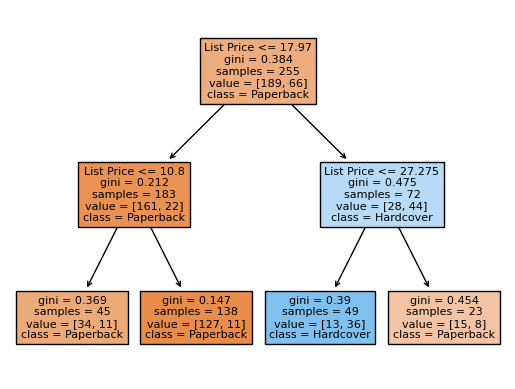

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)

In [16]:
# Check the number of observations in the training and testing sets
print(f"Number of observations in training set: {X_train.shape[0]}")
print(f"Number of observations in testing set: {X_test.shape[0]}")


Number of observations in training set: 255
Number of observations in testing set: 64


Q5.

[Text(0.4342105263157895, 0.9, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.21052631578947367, 0.7, 'NumPages <= 82.0\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.10526315789473684, 0.5, 'Thick <= 0.25\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = Hardcover'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Hardcover'),
 Text(0.3157894736842105, 0.5, 'Thick <= 1.65\ngini = 0.175\nsamples = 176\nvalue = [159, 17]\nclass = Paperback'),
 Text(0.2631578947368421, 0.3, 'Thick <= 0.55\ngini = 0.166\nsamples = 175\nvalue = [159, 16]\nclass = Paperback'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = Paperback'),
 Text(0.3157894736842105, 0.1, 'gini = 0.199\nsamples = 143\nvalue = [127, 16]\nclass = Paperback'),
 Text(0.3684210526315789, 

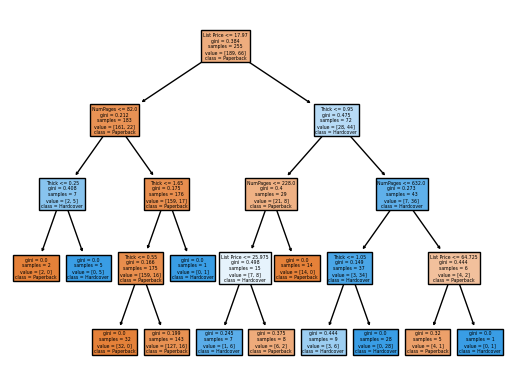

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features and target
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)

Q6.

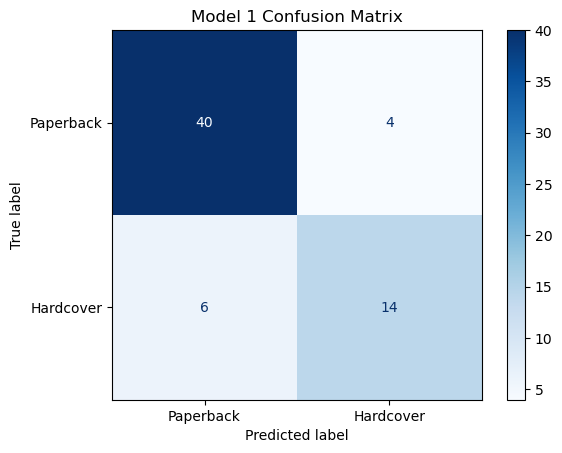

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

y_pred1 = clf.predict(X_test[['List Price']])
cm1 = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Paperback', 'Hardcover'])
disp1.plot(cmap='Blues')
plt.title('Model 1 Confusion Matrix')
plt.show()

In [29]:
TN1, FP1, FN1, TP1 = cm1.ravel()

accuracy1 = accuracy_score(y_test, y_pred1)
sensitivity1 = TP1 / (TP1 + FN1)
specificity1 = TN1 / (TN1 + FP1)

print(f"Model 1 Accuracy: {accuracy1:.2f}")
print(f"Model 1 Sensitivity (Recall): {sensitivity1:.2f}")
print(f"Model 1 Specificity: {specificity1:.2f}")

Model 1 Accuracy: 0.84
Model 1 Sensitivity (Recall): 0.70
Model 1 Specificity: 0.91


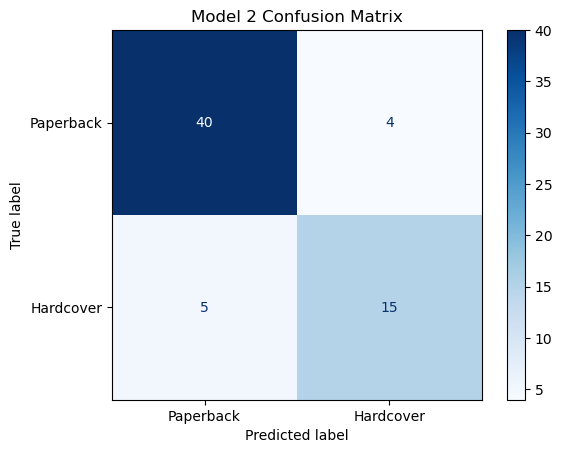

In [28]:
y_pred2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Paperback', 'Hardcover'])
disp2.plot(cmap='Blues')
plt.title('Model 2 Confusion Matrix')
plt.show()


In [30]:
TN2, FP2, FN2, TP2 = cm2.ravel()

accuracy2 = accuracy_score(y_test, y_pred2)
sensitivity2 = TP2 / (TP2 + FN2)
specificity2 = TN2 / (TN2 + FP2)

print(f"Model 2 Accuracy: {accuracy2:.2f}")
print(f"Model 2 Sensitivity (Recall): {sensitivity2:.2f}")
print(f"Model 2 Specificity: {specificity2:.2f}")

Model 2 Accuracy: 0.86
Model 2 Sensitivity (Recall): 0.75
Model 2 Specificity: 0.91


Q7.

The differences between the two confusion matrices are due to the different features used for prediction. The first model uses only List Price, which may not fully capture the complexities of the target variable, potentially leading to less accurate predictions. The second model includes additional features NumPages and Thick, which may provide more information. The two confusion matrices above are better because they use more consistent features and a properly split training and test set.

Q8.

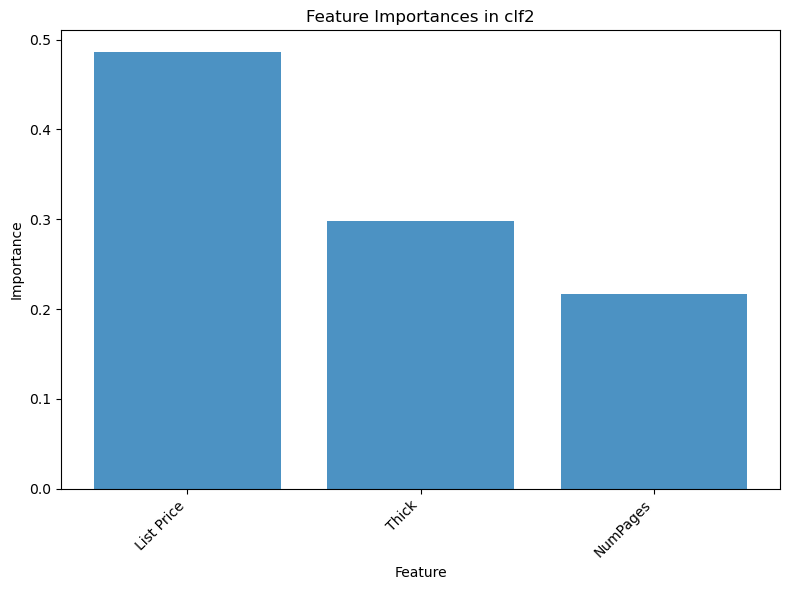

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from clf2
feature_importances = clf2.feature_importances_

# Feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns.tolist()

# Sort features by importance (optional)
indices = np.argsort(feature_importances)[::-1]  # Descending order

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center', alpha=0.8)
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in clf2')
plt.tight_layout()
plt.show()


In [32]:
# Access feature names and feature importances
feature_names = clf2.feature_names_in_
feature_importances = clf2.feature_importances_

# Find the most important feature
most_important_idx = feature_importances.argmax()  # Index of the highest importance score
most_important_feature = feature_names[most_important_idx]
most_important_value = feature_importances[most_important_idx]

# Print the most important feature
print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_value:.4f}.")


The most important feature is 'List Price' with an importance score of 0.4860.


Here’s a summary of our conversation:

1. **Decision Tree Model Fitting**:
   - You fit a `DecisionTreeClassifier` model using scikit-learn.
   - I explained how the `.fit()` method trains the model in two steps: building the tree structure and determining splits based on the data.

2. **Training-Testing Split**:
   - You wanted to split your data into training and testing sets using an 80/20 split.
   - I provided a step-by-step example using `train_test_split` from scikit-learn and explained how to check the number of observations in each set with `.shape`.

3. **Confusion Matrix and Metrics**:
   - You asked how to create a confusion matrix for evaluating model performance.
   - I provided code for generating a confusion matrix, plotting it with `ConfusionMatrixDisplay`, and calculating accuracy, sensitivity, and specificity.

4. **Feature Importance Visualization**:
   - You asked how to visualize feature importances for a decision tree model.
   - I explained how to use `.feature_importances_` and create a bar chart with feature names for interpretation.

5. **Identifying the Most Important Predictor**:
   - You wanted to determine the most important predictor variable using `.feature_names_in_` and `.feature_importances_`.
   - I provided code to identify and report the feature with the highest importance score.

If you have further questions or need clarification, feel free to ask! 😊

https://chatgpt.com/share/673809bd-28e4-800b-bf55-b1a7b3493e56

Q9.

In linear regression, coefficients show how much each predictor affects the outcome, assuming a linear relationship. In decision trees, feature importances show each feature's contribution to reducing uncertainty during splits, without assuming a linear relationship.

Q10.

Yes